<a href="https://colab.research.google.com/github/landen5/ImageCompressionSVD/blob/main/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will work with a randomly generated 7x7 image. First we apply SVD to it, then see all of the rank 1 images corresponding to all singular values. Then we can construct the best rank r image by adding all rank 1 images corresponding to singular values from 1 to r.

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot

np.random.seed(42)
n = 7
IMG = np.random.randint(0,2,(n,n))
np.linalg.matrix_rank(IMG)

IMG

array([[0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1]])

Note: The rank of a matrix is defined as the number of linearly independent rows/columns in the matrix.

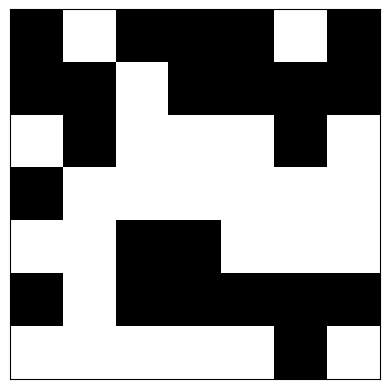

In [ ]:
def plot_img(img):
  pyplot.imshow(img, cmap="gray")
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.show()

plot_img(IMG)

Now let's decompose this image using SVD

In [ ]:
U, S, V_T = np.linalg.svd(IMG)
U.shape, S.shape, V_T.shape #((7, 7), (7,), (7, 7))

print("S: ", np.around(S, decimals=4))

with np.printoptions(precision=1):
  print("U: \n", U, "\n")
  print("V_T: \n", V_T)

S:  [4.3372 2.0078 1.3004 0.9417 0.6827 0.3364 0.    ]
U: 
 [[-1.5e-01 -5.9e-01 -2.2e-01 -2.4e-02 -1.9e-01  7.4e-01  0.0e+00]
 [-8.5e-02  2.0e-01 -4.7e-01  3.0e-02 -8.3e-01 -2.1e-01  6.4e-17]
 [-4.5e-01  5.3e-01  1.7e-01 -1.3e-01 -2.6e-02  3.7e-01 -5.8e-01]
 [-5.3e-01 -1.5e-01 -5.4e-01 -4.2e-01  3.9e-01 -3.0e-01  2.5e-17]
 [-4.4e-01 -4.1e-01  6.2e-01 -1.8e-01 -3.4e-01 -3.3e-01  8.5e-18]
 [-9.3e-02 -3.1e-01 -1.4e-01  6.8e-01  1.1e-01 -2.6e-01 -5.8e-01]
 [-5.4e-01  2.2e-01  3.4e-02  5.5e-01  8.1e-02  1.1e-01  5.8e-01]] 

V_T: 
 [[-3.3e-01 -4.0e-01 -3.7e-01 -3.5e-01 -4.5e-01 -2.6e-01 -4.5e-01]
 [ 1.7e-01 -6.1e-01  4.0e-01  3.0e-01  9.6e-02 -5.7e-01  9.6e-02]
 [ 6.4e-01 -1.8e-01 -6.2e-01 -2.5e-01  2.3e-01 -1.0e-01  2.3e-01]
 [ 2.5e-01  6.4e-01  2.8e-02 -3.6e-03 -2.0e-01 -6.7e-01 -2.0e-01]
 [-4.1e-01  7.3e-02 -5.6e-01  6.5e-01  1.6e-01 -2.0e-01  1.6e-01]
 [ 4.7e-01 -8.6e-02 -7.1e-02  5.5e-01 -4.2e-01  3.3e-01 -4.2e-01]
 [ 0.0e+00  0.0e+00 -2.0e-16  1.3e-16 -7.1e-01 -2.2e-17  7.1e-01]]


Below are all rank 1 images. These are constructed by taking the outer product of columns of U and rows of V_T and then multiplying/scaling by corresponding sigma value in S.

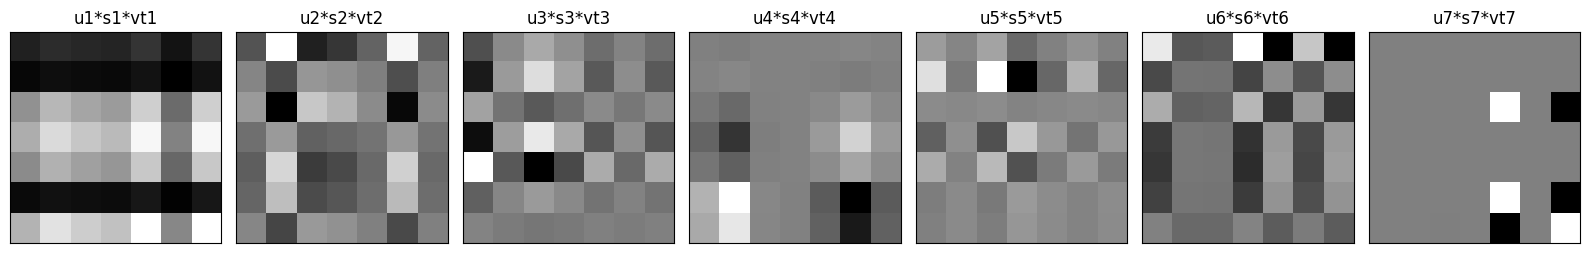

In [ ]:
rank_1_images = []

fig = pyplot.figure(1, (16,8))

for index,(u,s,v_t) in enumerate(zip(U.T, S, V_T)):
  ax = pyplot.subplot(1,n,index+1)
  rank_1_img = s * np.outer(u, v_t)
  rank_1_images.append(rank_1_img)
  ax.imshow(rank_1_img, cmap="gray")
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"u{index+1}*s{index+1}*vt{index+1}")
  pyplot.tight_layout()

We'll use these rank 1 images to construct the image close to original image. We do this by summing rank 1 images. Also by doing this we increase the rank of the matrix and thus the information stored i.e., the constructed image will resemble more close to the original image as we cumulate more and more rank 1 images.

The best rank 1 approximation is noting but just the outer product of u1 with v1 and scaled by s1

IMG_rank1: 
 [[0.22 0.27 0.24 0.23 0.3  0.17 0.3 ]
 [0.12 0.15 0.14 0.13 0.17 0.09 0.17]
 [0.64 0.78 0.72 0.68 0.88 0.5  0.88]
 [0.75 0.92 0.84 0.8  1.03 0.58 1.03]
 [0.62 0.76 0.7  0.66 0.85 0.48 0.85]
 [0.13 0.16 0.15 0.14 0.18 0.1  0.18]
 [0.77 0.95 0.87 0.82 1.06 0.6  1.06]]


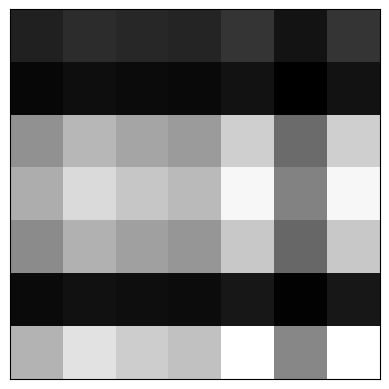

In [ ]:
IMG_rank1 = S[0] * np.outer(U[:, 0], V_T[0, :])

with np.printoptions (precision=2):
  print("IMG_rank1: \n", IMG_rank1)

plot_img(IMG_rank1)

The best rank 2 image is the sum of above best rank 1 image and outer product of u2 with v2 and scaled by s2.

IMG_rank2: 
 [[ 0.02  0.99 -0.23 -0.13  0.18  0.85  0.18]
 [ 0.19 -0.1   0.3   0.25  0.2  -0.13  0.2 ]
 [ 0.82  0.13  1.14  1.    0.98 -0.11  0.98]
 [ 0.7   1.1   0.72  0.71  1.    0.75  1.  ]
 [ 0.48  1.27  0.37  0.41  0.77  0.96  0.77]
 [ 0.03  0.54 -0.1  -0.04  0.12  0.45  0.12]
 [ 0.85  0.67  1.05  0.96  1.1   0.35  1.1 ]]


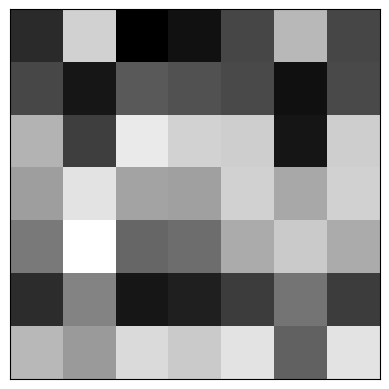

In [ ]:
IMG_rank2 = S[0] * np.outer(U[:, 0], V_T[0, :]) + \
            S[1] * np.outer(U[:, 1], V_T[1, :])

with np.printoptions(precision=2):
  print("IMG_rank2: \n", IMG_rank2)

plot_img(IMG_rank2)

Similarly, the best rank i image is the sum of best rank (i-1) image and outer product of ui with vi scaled by si.

We will construct best rank i image by summing all rank 1 images corresponding to singular values from 1 to i.

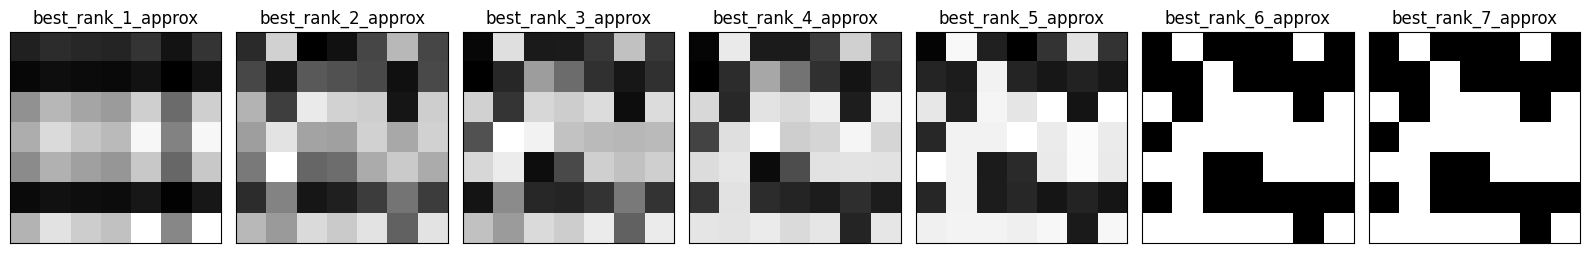

In [ ]:
fig = pyplot.figure(1, (16,8))

for i in range(1, len(S)+1):
  best_rank_i_approx = np.zeros_like(IMG, dtype="float64")
  for j in range(i):
    best_rank_i_approx += rank_1_images[j]

  ax = pyplot.subplot(1,n,i)
  ax.imshow(best_rank_i_approx, cmap="gray")
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"best_rank_{i}_approx")
  pyplot.tight_layout()

We can clearly see that as we add more rank 1 images, the approximated image gets closer to the original.

However, it wouldn't make sense to go to rank r as that is just the same original image. So instead, we stop earlier at a rank that balances quality and storage. Note also that in all cases, we would at least stop at best rank 6 approximation, because rank 7 is the same as rank 6 since the original image is rank 6 and the last singular value is 0, adding nothing to the image.

Assuming we were satisfied with the best rank 3 approximation, let's see how much space we saved.

In [ ]:
# these spaces are in units

original_space = 7*7
print("original space: ", original_space)

best_rank_3_space = 3*(7+7) + 3 #S is 3
print("best_rank_3_space: ", best_rank_3_space)

space_saved = 1 - best_rank_3_space / original_space
print(f"space saved: {space_saved * 100} %")

original space:  49
best_rank_3_space:  45
space saved: 8.163265306122447 %


Although this may seem negligible, it's quite remarkble for a tiny 7x7 image. In the case of real life bigger images, we save a lot of space while retaining near identical image quality.  

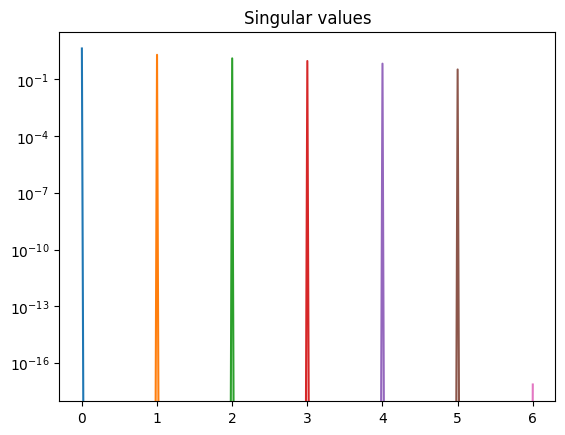

In [ ]:
pyplot.figure(1)
pyplot.semilogy(np.diag(S))
pyplot.title("Singular values")
pyplot.show()


Plotting the singular values can also be helpful in detemining the fraction of the "energy" captured by the first r modes. However, this is only really useful when compressing larger images. In my next example of a larger image, we will see how this can be applied.